### DCC - Sirius Education
##Componentes:
* Gabriel Nunes Barbosa Nogueira
* Filipe Cruz
* Daniel Arnobio
* Xaiene
* Andred Deitos
##Projeto O-PY-THA_ON

###Descrição: 
* Nesse notebook constaram análises estátisticas com uso de bibliotecas específicas para isso.

In [249]:
###Importando os pacotes necessários:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px

###Nesse primeiro momento vamos está lendo os bancos de dados

In [250]:
#Inserindo os caminhos
caminho_produção='/content/drive/MyDrive/DCC_SIRIUS/pam_alimentos_cesta.xlsx'
caminho_produçao_2='/content/drive/MyDrive/DCC_SIRIUS/pam.xlsx'
caminho_consumo='/content/drive/MyDrive/DCC_SIRIUS/pof_rendimento_regiao_2.xlsx'
caminho_consumo_2='/content/drive/MyDrive/DCC_SIRIUS/consumo_2.xlsx'
caminho_medio_ano='/content/drive/MyDrive/DCC_SIRIUS/pof_media_consumo_kg_ano1.xlsx'

In [251]:
producao = pd.read_excel(caminho_produção, index_col='Ano')
producao_2 = pd.read_excel(caminho_produçao_2)
consumo = pd.read_excel(caminho_consumo)
consumo_2=pd.read_excel(caminho_consumo_2)
consumo_medio_ano = pd.read_excel(caminho_medio_ano)

###Vamos começar vendo nossos dados e verificando as variáveis categoricas e númericas


In [252]:
producao.head(3)

,Arroz,Café (em grão),Cana-de-açúcar,Feijão (em grão),Mandioca,Milho (em grão),Soja (em grão),Tomate,Trigo (em grão)
Ano,,,,,,,,,
1974,6764038,3230618,95623685,2238012,24797636,16273227,7876527,1144037,2858530
1975,7781538,2544596,91524559,2282466,26117614,16334516,9893008,1049724,1788180
1976,9757079,751969,103173449,1840315,25443053,17751077,11227123,1166888,3215745


In [253]:
producao.dtypes

Arroz               int64
Café (em grão)      int64
Cana-de-açúcar      int64
Feijão (em grão)    int64
Mandioca            int64
Milho (em grão)     int64
Soja (em grão)      int64
Tomate              int64
Trigo (em grão)     int64
dtype: object

In [254]:
producao_2.head(3)

,Ano,Item,Produçao
0,1974,Arroz,6764038
1,1975,Arroz,7781538
2,1976,Arroz,9757079


In [255]:
producao_2.dtypes

Ano          int64
Item        object
Produçao     int64
dtype: object

In [256]:
consumo.head(3)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
0,Arroz polido,Brasil,18.22,20.48,20.28,18.80,14.86,15.57,12.40
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87
2,Arroz polido,Nordeste,20.33,22.35,22.21,19.58,14.12,15.28,10.86


In [257]:
consumo.dtypes

Items        object
Região       object
Total       float64
Classe F    float64
Classe E    float64
Classe D    float64
Classe C    float64
Classe B    float64
Classe A    float64
dtype: object

In [258]:
consumo_2.head()

,Unnamed: 0,Items,Região,Total,Classe,Produção (t)
0,0,Arroz polido,Brasil,18.22,Classe F,20.48
1,1,Arroz polido,Norte,17.94,Classe F,17.84
2,2,Arroz polido,Nordeste,20.33,Classe F,22.35
3,3,Arroz polido,Sudeste,17.05,Classe F,18.96
4,4,Arroz polido,Sul,14.70,Classe F,15.58


In [259]:
consumo_2.head()
#Apagando a primeira coluna, ela é irrelevante!
consumo_2.drop('Unnamed: 0',axis=1,inplace=True)

In [260]:
consumo_2.dtypes

Items            object
Região           object
Total           float64
Classe           object
Produção (t)    float64
dtype: object

In [261]:
consumo_medio_ano.head()

,Item,2002,2008,2018
0,Arroz,31.58,26.50,19.76
1,Feijão,12.40,9.11,5.91
2,Farinha de mandioca,7.77,5.33,2.33
3,Farinha de trigo,5.08,3.40,2.23
4,Fubá de milho,3.19,2.30,1.28


In [262]:
consumo_medio_ano.dtypes

Item     object
2002    float64
2008    float64
2018    float64
dtype: object

In [263]:
 ###Vamos puxar algumas colunas
 consumo.columns

Index(['Items', 'Região', 'Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A'],
      dtype='object')

#Vamos agora fazer algumas questões estatísticas para a tabela consumo.
* OBS: As análises serão feitas a nível nacional nesse momento.

#Medidas de dispersão
#Desvio Padrão

In [264]:
###Vamos fazer algumas análises de variancia, desvio padrão, média, mediana
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].std()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,3.194442,3.990517,5.443815,3.122484,3.504072,2.344071,1.927469
Açúcar cristal,1.132756,1.379663,1.302454,1.105002,1.836164,1.021621,2.156961
Café moído,0.156674,0.130179,0.187448,0.211156,0.197053,0.317091,0.480475
Farinha de mandioca,4.003951,4.256274,4.448567,3.553926,4.254468,2.965417,1.873781
Farinha de trigo,2.469694,2.587423,2.640641,2.818813,2.007683,1.806363,2.052089
Feijão-mulatinho,0.425053,0.395108,0.484066,0.383197,0.632255,0.289114,0.273087
Feijão-preto,0.842061,1.177517,1.090885,0.849706,0.694860,0.593015,0.527740
Fubá de milho,0.725996,1.061979,0.710230,0.522255,0.310403,0.469241,0.266758
Molho de tomate,0.412408,0.282660,0.342778,0.417680,0.333632,0.505902,0.457763


#Variância

In [265]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].var()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,10.204457,15.924227,29.635120,9.749907,12.278520,5.494670,3.715137
Açúcar cristal,1.283137,1.903470,1.696387,1.221030,3.371497,1.043710,4.652480
Café moído,0.024547,0.016947,0.035137,0.044587,0.038830,0.100547,0.230857
Farinha de mandioca,16.031627,18.115867,19.789747,12.630387,18.100497,8.793697,3.511057
Farinha de trigo,6.099390,6.694760,6.972987,7.945707,4.030790,3.262947,4.211070
Feijão-mulatinho,0.180670,0.156110,0.234320,0.146840,0.399747,0.083587,0.074577
Feijão-preto,0.709067,1.386547,1.190030,0.722000,0.482830,0.351667,0.278510
Fubá de milho,0.527070,1.127800,0.504427,0.272750,0.096350,0.220187,0.071160
Molho de tomate,0.170080,0.079897,0.117497,0.174457,0.111310,0.255937,0.209547


#Medidas de tendência central
#Mediana

In [266]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].median()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,18.080,19.720,19.960,18.735,14.730,16.030,12.640
Açúcar cristal,5.930,6.230,6.490,6.540,6.330,4.675,4.360
Café moído,2.320,2.195,2.440,2.270,2.265,2.320,2.595
Farinha de mandioca,1.460,2.330,1.915,1.230,1.015,0.820,0.865
Farinha de trigo,1.700,1.310,1.535,1.900,1.750,2.075,1.820
Feijão-mulatinho,0.580,0.605,0.720,0.600,0.350,0.315,0.335
Feijão-preto,1.055,0.845,0.995,1.250,1.055,1.255,1.075
Fubá de milho,0.960,1.185,1.050,0.965,0.800,0.575,0.545
Molho de tomate,0.815,0.480,0.580,0.745,1.110,1.225,1.595


#Média

In [267]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].mean()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,18.718333,20.373333,21.760000,19.093333,16.020000,15.595000,12.578333
Açúcar cristal,6.191667,6.525000,6.926667,6.555000,6.271667,4.775000,4.660000
Café moído,2.313333,2.176667,2.388333,2.286667,2.305000,2.323333,2.551667
Farinha de mandioca,3.096667,3.576667,3.576667,2.746667,2.858333,2.048333,1.808333
Farinha de trigo,2.525000,2.150000,2.426667,2.936667,2.515000,2.526667,2.445000
Feijão-mulatinho,0.665000,0.715000,0.830000,0.700000,0.586667,0.326667,0.358333
Feijão-preto,1.236667,1.273333,1.355000,1.300000,1.135000,1.306667,1.255000
Fubá de milho,1.165000,1.580000,1.236667,1.045000,0.875000,0.723333,0.630000
Molho de tomate,0.810000,0.488333,0.618333,0.791667,1.065000,1.258333,1.483333


#1 quartil

In [268]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].quantile(0.25)

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,17.2725,18.1200,19.4075,17.3725,14.2400,15.3525,11.2450
Açúcar cristal,5.5700,5.8975,6.0450,5.8550,5.4625,4.0600,2.9875
Café moído,2.2850,2.0800,2.2650,2.1375,2.1725,2.0750,2.4650
Farinha de mandioca,0.5900,0.6425,0.6425,0.5475,0.4375,0.5450,0.4625
Farinha de trigo,1.3450,0.9475,1.2000,1.6500,1.6800,1.4100,1.6925
Feijão-mulatinho,0.3975,0.4500,0.5450,0.4675,0.2025,0.1200,0.1175
Feijão-preto,0.6375,0.5250,0.6150,0.7350,0.7150,0.7775,0.8975
Fubá de milho,0.8025,0.9825,0.8850,0.8100,0.7125,0.4125,0.4675
Molho de tomate,0.5150,0.2875,0.3875,0.5325,0.8375,0.9050,1.3075


#2 quartil

In [269]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].quantile(0.50)

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,18.080,19.720,19.960,18.735,14.730,16.030,12.640
Açúcar cristal,5.930,6.230,6.490,6.540,6.330,4.675,4.360
Café moído,2.320,2.195,2.440,2.270,2.265,2.320,2.595
Farinha de mandioca,1.460,2.330,1.915,1.230,1.015,0.820,0.865
Farinha de trigo,1.700,1.310,1.535,1.900,1.750,2.075,1.820
Feijão-mulatinho,0.580,0.605,0.720,0.600,0.350,0.315,0.335
Feijão-preto,1.055,0.845,0.995,1.250,1.055,1.255,1.075
Fubá de milho,0.960,1.185,1.050,0.965,0.800,0.575,0.545
Molho de tomate,0.815,0.480,0.580,0.745,1.110,1.225,1.595


#3 quartil

In [270]:
consumo.groupby('Items')[['Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']].quantile(0.75)

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
Items,,,,,,,
Arroz polido,19.8025,21.8825,21.7275,19.3850,17.7025,16.6925,12.9700
Açúcar cristal,6.8600,6.5175,7.1900,7.1350,7.7375,5.6875,6.3850
Café moído,2.3700,2.2875,2.5175,2.3725,2.4625,2.5125,2.7850
Farinha de mandioca,3.4850,4.0325,4.1925,3.0600,2.7100,1.5900,3.1350
Farinha de trigo,2.1075,1.4250,1.8400,2.4650,2.3600,2.7100,2.3825
Feijão-mulatinho,0.6875,0.8350,0.9550,0.7475,0.6475,0.3525,0.5450
Feijão-preto,1.4650,1.6525,1.5550,1.4950,1.3200,1.8150,1.4025
Fubá de milho,1.2225,1.9200,1.3875,1.1950,0.8275,0.8425,0.6900
Molho de tomate,1.0475,0.5900,0.9000,0.9875,1.2550,1.5225,1.7400


#Descrição dos dados

In [271]:
consumo.describe()

,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,4.141833,4.357167,4.615500,4.245167,3.810167,3.487500,3.120667
std,5.472537,6.013702,6.489149,5.577094,4.806215,4.487416,3.621941
min,0.290000,0.170000,0.180000,0.290000,0.120000,0.060000,0.080000
25%,0.802500,0.657500,0.845000,0.830000,0.790000,0.822500,0.737500
50%,2.140000,2.025000,2.005000,1.965000,1.780000,1.920000,1.825000
75%,5.002500,5.215000,5.677500,5.432500,4.855000,4.060000,3.392500
max,24.070000,27.030000,32.290000,24.800000,21.730000,18.180000,15.870000


#BoxPlot
* Gráficos de boxplot gerados para cada classe em nível nacional

In [272]:
px.box(consumo,x='Items', y='Classe A',title = 'Disperção dos dados de consumo da Classe A por alimento da cesta básica - 2017-2018')

In [273]:
px.box(consumo,x='Items', y='Classe B',title = 'Disperção dos dados de consumo da Classe B por alimento da cesta básica - 2017-2018')

In [274]:
px.box(consumo,x='Items', y='Classe C',title = 'Disperção dos dados de consumo da Classe C por alimento da cesta básica - 2017-2018')

In [275]:
px.box(consumo,x='Items', y='Classe D',title = 'Disperção dos dados de consumo da Classe D por alimento da cesta básica - 2017-2018')

In [276]:
px.box(consumo,x='Items', y='Classe E',title = 'Disperção dos dados de consumo da Classe E por alimento da cesta básica - 2017-2018')

In [277]:
px.box(consumo,x='Items', y='Classe F',title = 'Disperção dos dados de consumo da Classe F por alimento da cesta básica - 2017-2018')

#Displot(Sem tratamento)


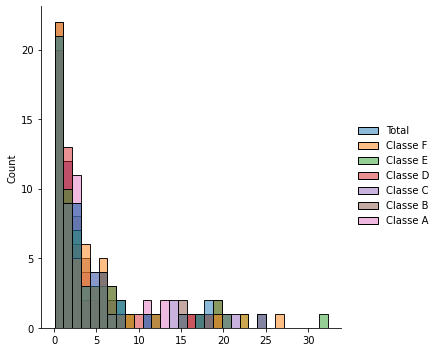

In [278]:
sns.displot(consumo)

#Visualizando o maior consumo de cada classe
* Nosso objetivo aqui também é vericar a região e o item mais consumido por essa classe

In [279]:
consumo.sort_values('Classe A' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
1,Arroz polido,Norte,17.94,17.84,19.64,16.94,18.65,16.49,15.87


In [280]:
consumo.sort_values('Classe B' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.8,21.73,18.18,12.88


In [281]:
consumo.sort_values('Classe C' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.8,21.73,18.18,12.88


In [282]:
consumo.sort_values('Classe D' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.8,21.73,18.18,12.88


In [283]:
consumo.sort_values('Classe E' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.8,21.73,18.18,12.88


In [284]:
consumo.sort_values('Classe F' ,ascending=False).head(1)

,Items,Região,Total,Classe F,Classe E,Classe D,Classe C,Classe B,Classe A
5,Arroz polido,Centro-Oeste,24.07,27.03,32.29,24.8,21.73,18.18,12.88


In [285]:
consumo.columns

Index(['Items', 'Região', 'Total', 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A'],
      dtype='object')

#Separando as variaveis Númericas para verificação da distribuição normal de nossos dados.
* **Essa distribuição se baseia no consumo alimentar dos brasileiros por classe.**

In [286]:
consumo_num=consumo[['Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



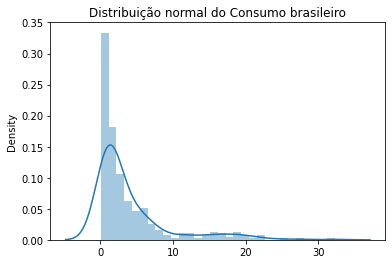

In [287]:
sns.distplot(consumo_num).set_title("Distribuição normal do Consumo brasileiro");

In [288]:
consumo['Região'].unique()

array(['Brasil', 'Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [289]:
##Verificando se temos valores unicos
consumo.nunique()

Items       10
Região       6
Total       56
Classe F    56
Classe E    56
Classe D    58
Classe C    55
Classe B    56
Classe A    55
dtype: int64

In [290]:
###Verificando se temos valores duplicados
consumo.duplicated().sum()

0

In [291]:
###Verificamos se temos valores nulos
consumo.isna().sum()

Items       0
Região      0
Total       0
Classe F    0
Classe E    0
Classe D    0
Classe C    0
Classe B    0
Classe A    0
dtype: int64

### Agora, o próximo passo é analisar por região por meio das querys

In [292]:
consumo_nordeste = consumo[consumo['Região']=='Nordeste']
consumo_centro_oeste = consumo[consumo['Região']=='Centro-Oeste']
consumo_norte = consumo[consumo['Região']=='Norte']
consumo_sul = consumo[consumo['Região']=='Sul']
consumo_sudeste = consumo[consumo['Região']=='Sudeste']
consumo_brasil = consumo[consumo['Região']=='Brasil']

#Fazendo uma análise visual dos dados através dos boxplots
###O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

In [293]:
fig_brasil = px.box(consumo_brasil, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao nordeste')
fig_brasil.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig_brasil.show()

In [294]:
fig = px.box(consumo_nordeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao nordeste')
fig.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig.show()

In [295]:
fig2 = px.box(consumo_norte, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao norte')
fig2.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig2.show()

In [296]:
fig3 = px.box(consumo_sul, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao sul')
fig3.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig3.show()

In [297]:
fig4= px.box(consumo_sudeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao sudeste')
fig4.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig4.show()

In [298]:
fig5 = px.box(consumo_centro_oeste, x = 'Items', y = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E'], title = 'Consumo de alimentos por classe na regiao centro-oeste')
fig5.update_layout(
    yaxis_title='Consumo anual per capita(Kg)',
    xaxis_title='Alimentos'
)
fig5.show()

#Agora, vamos usar o statsmodel para tirarmos algumas conclusões estatisticas mais aprofundadas usando o modelo de regressão linear de várias variáveis.


*   **Nosso objetivo aqui é verificar como o consumo de cada item para cada classe influencia no total**




In [299]:
lista_cesta=list(consumo['Items'].unique())
for item in lista_cesta:
  print(item)

 Arroz polido
Feijão-mulatinho
Feijão-preto
Farinha de mandioca
Farinha de trigo
Fubá de milho
Açúcar cristal
Molho de tomate
Óleo de soja
Café moído


## Nesse momento, vamos dividir o dataset de consumo por item e depois usar o statsmodel para verificarmos de forma estatística como o consumo per capita de cada classe influencia no total, isso separado por item.

In [300]:
#Vamos separar
#Feijão-preto
# Farinha de mandioca
# Farinha de trigo
# Fubá de milho
# Açúcar cristal
# Molho de tomate
# Óleo de soja
# Café moído
df_arroz=consumo[consumo['Items']==' Arroz polido']
df_f_mulatinho=consumo[consumo['Items']=='Feijão-mulatinho']
df_f_preto=consumo[consumo['Items']=='Feijão-preto']
df_far_mandioca=consumo[consumo['Items']=='Farinha de mandioca']
df_far_trigo=consumo[consumo['Items']=='Farinha de trigo']
df_fuba=consumo[consumo['Items']=='Fubá de milho']
df_acucar=consumo[consumo['Items']=='Açúcar cristal']
df_molho_tomate=consumo[consumo['Items']=='Molho de tomate']
df_oleo_soja=consumo[consumo['Items']=='Óleo de soja']
df_cafe_moido=consumo[consumo['Items']=='Café moído']

* Arroz polido

In [301]:
Y1 = df_arroz['Total']
X1 = df_arroz[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1,X1)
resultados1 = model1.fit()

print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 170.52
No. Observations:                   6   AIC:                            -329.0
Df Residuals:                       0   BIC:                            -330.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1093        inf          0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [302]:
#Os parametros da nossa função de regressão linear
parametros_df1=resultados1.params
parametros_df1

const       1.109346
Classe F   -0.618440
Classe E    2.114056
Classe D   -2.295636
Classe C   -1.745542
Classe B    4.039731
Classe A   -0.556344
dtype: float64

* Feijão-mulatinho

In [303]:
Y2 = df_f_mulatinho['Total']
X2 = df_f_mulatinho[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2)
resultados2 = model2.fit()
print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 208.61
No. Observations:                   6   AIC:                            -405.2
Df Residuals:                       0   BIC:                            -406.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0703        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [304]:
#Os parametros da nossa função de regressão linear
parametros_df2=resultados2.params
parametros_df2

const      -0.070294
Classe F    0.302207
Classe E   -0.049573
Classe D    0.709196
Classe C    0.144215
Classe B   -0.165322
Classe A    0.092997
dtype: float64

* Feijão-preto

In [305]:
Y3 = df_f_preto['Total']
X3 = df_f_preto[[ 'Classe F', 'Classe E', 'Classe D',
     'Classe C', 'Classe B', 'Classe A']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3,X3)
resultado3 = model3.fit()
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 193.98
No. Observations:                   6   AIC:                            -376.0
Df Residuals:                       0   BIC:                            -377.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0287        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [306]:
#Os parametros da nossa função de regressão linear
parametros_df3=resultado3.params
parametros_df3

const      -0.028660
Classe F    0.021142
Classe E    0.360927
Classe D    0.353746
Classe C    0.070791
Classe B    0.142772
Classe A    0.017989
dtype: float64

* Farinha de mandioca

In [307]:
Y4 = df_far_mandioca['Total']
X4 = df_far_mandioca[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X4 = sm.add_constant(X4)
model4 = sm.OLS(Y4,X4)
resultados4 = model4.fit()

print(resultados4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 188.87
No. Observations:                   6   AIC:                            -365.7
Df Residuals:                       0   BIC:                            -367.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0201        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [308]:
#Os parametros da nossa função de regressão linear
parametros_df4=resultados4.params
parametros_df4

const      -0.020098
Classe F    0.164706
Classe E    0.236830
Classe D    0.303780
Classe C    0.261736
Classe B   -0.019929
Classe A    0.076819
dtype: float64

* Farinha de trigo

In [309]:
Y5 = df_far_trigo['Total']
X5 = df_far_trigo[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X5 = sm.add_constant(X5)
model5 = sm.OLS(Y5,X5)
resultados5 = model5.fit()

print(resultados5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 187.20
No. Observations:                   6   AIC:                            -362.4
Df Residuals:                       0   BIC:                            -363.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0344        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [310]:
#Os parametros da nossa função de regressão linear
parametros_df5=resultados5.params
parametros_df5

const      -0.034442
Classe F   -0.042350
Classe E    0.700184
Classe D    0.095511
Classe C    0.076354
Classe B    0.263756
Classe A   -0.076710
dtype: float64

* Fubá de milho

In [311]:
Y6 = df_fuba['Total']
X6 = df_fuba[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X6 = sm.add_constant(X6)
model6 = sm.OLS(Y6,X6)
resultados6 = model6.fit()

print(resultados6.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 206.86
No. Observations:                   6   AIC:                            -401.7
Df Residuals:                       0   BIC:                            -403.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3960        inf         -0        n

In [312]:
#Os parametros da nossa função de regressão linear
parametros_df6=resultados6.params
parametros_df6

const      -0.395974
Classe F    0.173845
Classe E    0.259382
Classe D    0.138723
Classe C    0.826884
Classe B    0.092460
Classe A    0.047877
dtype: float64

* Açúcar cristal

In [313]:
Y7 = df_acucar['Total']
X7 = df_acucar[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X7 = sm.add_constant(X7)
model7 = sm.OLS(Y7,X7)
resultados7 = model7.fit()

print(resultados7.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 177.70
No. Observations:                   6   AIC:                            -343.4
Df Residuals:                       0   BIC:                            -344.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2359        inf          0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [314]:
#Os parametros da nossa função de regressão linear
parametros_df7=resultados7.params
parametros_df7

const       0.235872
Classe F   -0.421710
Classe E    0.967926
Classe D    0.300473
Classe C    0.196572
Classe B   -0.364270
Classe A    0.115861
dtype: float64

* Molho de tomate

In [315]:
Y8 = df_molho_tomate['Total']
X8= df_molho_tomate[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X8 = sm.add_constant(X8)
model8 = sm.OLS(Y8,X8)
resultados8 = model8.fit()

print(resultados8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 202.89
No. Observations:                   6   AIC:                            -393.8
Df Residuals:                       0   BIC:                            -395.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3455        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [316]:
#Os parametros da nossa função de regressão linear
parametros_df8=resultados8.params
parametros_df8

const      -0.345498
Classe F    0.497043
Classe E    0.217663
Classe D   -0.202029
Classe C    0.651401
Classe B    0.119906
Classe A    0.063035
dtype: float64

* Óleo de soja

In [317]:
Y9 = df_oleo_soja['Total']
X9 = df_oleo_soja[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X9 = sm.add_constant(X9)
model9 = sm.OLS(Y9,X9)
resultados9 = model9.fit()

print(resultados9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 189.75
No. Observations:                   6   AIC:                            -367.5
Df Residuals:                       0   BIC:                            -368.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3609        inf          0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [318]:
#Os parametros da nossa função de regressão linear
parametros_df9=resultados9.params
parametros_df9

const       0.360854
Classe F    0.181223
Classe E    0.302489
Classe D    0.231171
Classe C    0.265772
Classe B   -0.019140
Classe A   -0.089789
dtype: float64

* Café moído

In [319]:
Y10 = df_cafe_moido['Total']
X10 = df_cafe_moido[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X10 = sm.add_constant(X10)
model10 = sm.OLS(Y10,X10)
resultados10 = model10.fit()

print(resultados10.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                nan
Time:                        16:20:54   Log-Likelihood:                 181.81
No. Observations:                   6   AIC:                            -351.6
Df Residuals:                       0   BIC:                            -352.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102        inf          0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1729: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



In [320]:
#Os parametros da nossa função de regressão linear
parametros_df10=resultados10.params
parametros_df10

const       0.010171
Classe F   -0.413142
Classe E    0.515664
Classe D    1.013158
Classe C   -0.071674
Classe B   -0.037589
Classe A   -0.036587
dtype: float64

* Essa análise está sendo feita analisando o dataset como um todo, sem separar por item

In [321]:
# Declarar variáveis

Y = consumo['Total']
X = consumo[[ 'Classe F', 'Classe E', 'Classe D',
       'Classe C', 'Classe B', 'Classe A']]
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [322]:
model = sm.OLS(Y,X)
resultados = model.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5914.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           4.93e-73
Time:                        16:20:54   Log-Likelihood:                 8.6226
No. Observations:                  60   AIC:                            -3.245
Df Residuals:                      53   BIC:                             11.42
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.039      0.207      0.8

In [323]:
#Os parametros da nossa função de regressão linear
parametros_df=resultados.params
parametros_df

const       0.008177
Classe F    0.419742
Classe E    0.043908
Classe D    0.256026
Classe C    0.160581
Classe B    0.069891
Classe A    0.051160
dtype: float64

In [324]:
list(parametros.values)

[0.008177388204062275,
 0.4197419331607283,
 0.04390771295684581,
 0.2560256158815801,
 0.1605814901261966,
 0.06989139789504506,
 0.051160361482175176]